In [1]:
#set NK parameters and points for the x and y grid of the heatmap
import numpy as np
import canonical_nk as nk
params_d = {'beta': 0.99, 'gamma_pi': 1.5, 'gamma_y': 0.25, 'kappa': 0.05, 'dpbar': 1.005}
params = np.array(list(params_d.values()))


p = 0.99
q = 0.85
ns = 51
P = nk.transmat(ns,p,p)
Q = nk.transmat(ns,q,q)
etastd = 0.0035
psi = np.sqrt(ns-1)*etastd
eta = np.linspace(-psi,psi,num=ns)
ar_lim = 2
Ptil = np.zeros([ns,ns])
for i in np.arange(ns):
    if np.abs(eta[i]) <= ar_lim*etastd:
        Ptil[i,:] = P[i,:]
    else:
        Ptil[i,:] = Q[i,:]
(solution_type,yy,dp,notr,nomr) = nk.solve_model(eta,Ptil,params,ns)
(yyu,dpu,notru,nomru) = nk.solve_case(eta,Ptil,params,ns,0)
(solution_type1,yy1,dp1,notr1,nomr1) = nk.solve_model(eta,P,params,ns)
print(solution_type,solution_type1)

14 -1


/msu/home/m1gsa00/.conda/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


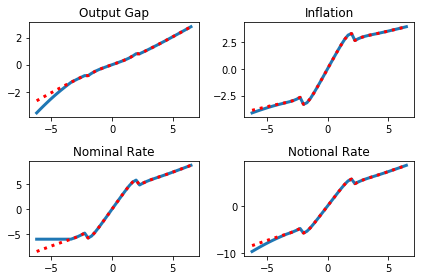

In [2]:
#Plot IRFs of linear and nonlinear model
import matplotlib.pyplot as plt
start = 3
end = ns+1-3
fig1, axs1 = plt.subplots(2, 2, tight_layout=True)
axs1[0,0].plot(eta[start:end]/etastd,100*yy[start:end],linewidth=3,label='Constrained') 
axs1[0,0].plot(eta[start:end]/etastd,100*yyu[start:end],'r:',linewidth=3,\
               label='Unconstrained') 
axs1[0,0].set_title('Output Gap')
axs1[0,1].plot(eta[start:end]/etastd,400*dp[start:end],linewidth=3,label='Constrained')
axs1[0,1].plot(eta[start:end]/etastd,400*dpu[start:end],'r:',linewidth=3,\
               label='Unconstrained')
axs1[0,1].set_title('Inflation')
axs1[1,0].plot(eta[start:end]/etastd,400*nomr[start:end],linewidth=3,label='Constrained')
axs1[1,0].plot(eta[start:end]/etastd,400*notru[start:end],'r:',linewidth=3,\
               label='Unconstrained')
axs1[1,0].set_title('Nominal Rate')
axs1[1,1].plot(eta[start:end]/etastd,400*notr[start:end],linewidth=3,label='Constrained') 
axs1[1,1].plot(eta[start:end]/etastd,400*notru[start:end],'r:',linewidth=3,\
               label='Unconstrained') 
axs1[1,1].set_title('Notional Rate')
plt.show()

In [3]:
#generate Heat Maps
Nrow = 100
Ncol = 100
pvec = np.linspace(0.95,0.995,num=Ncol)
eta_psi = np.linspace(0.005,0.035,num=Nrow)
rhoeta = 2*pvec-1
stdeta = eta_psi/np.sqrt(ns-1)
sol = np.zeros([Nrow,Ncol],dtype=int)
sol1 = np.zeros([Nrow,Ncol],dtype=int)

for i in np.arange(Ncol):
    for j in np.arange(Nrow):
        psi = eta_psi[j]
        p = pvec[i]
        eta = np.linspace(-psi,psi,num=ns)
        P = nk.transmat(ns,p,p)
        for k in np.arange(ns):
            if np.abs(eta[k]) <= ar_lim*etastd:
                Ptil[k,:] = P[k,:]
            else:
                Ptil[k,:] = Q[k,:]
        (sol[j,i],yy,dp,notr,nomr) = nk.solve_model(eta,Ptil,params,ns)
        (sol1[j,i],yy,dp,notr,nomr) = nk.solve_model(eta,P,params,ns)

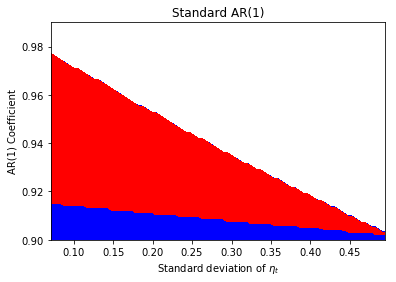

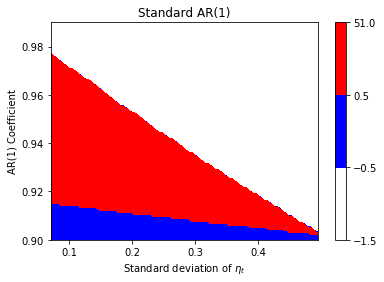

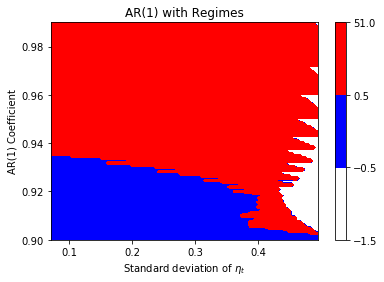

In [5]:
fig3, axs3 = plt.subplots(1, 1)
pos = axs3.contourf(100.0*stdeta, rhoeta, sol1,extend='neither',\
                    levels=[-1.5,-0.5,0.5,ns],colors=('w','b','r'))
axs3.set_xlabel('Standard deviation of $\eta_t$')
axs3.set_ylabel('AR(1) Coefficient')
axs3.set_title('Standard AR(1)')


fig2, axs2 = plt.subplots(1, 1)
fig2.colorbar(pos,ax=axs3)

pos = axs2.contourf(100.0*stdeta, rhoeta, sol,extend='neither',\
                    levels=[-1.5,-0.5,0.5,ns],colors=('w','b','r'))
axs2.set_xlabel('Standard deviation of $\eta_t$')
axs2.set_ylabel('AR(1) Coefficient')
axs2.set_title('AR(1) with Regimes')
fig2.colorbar(pos,ax=axs2)
plt.show()